# Plot Shapes

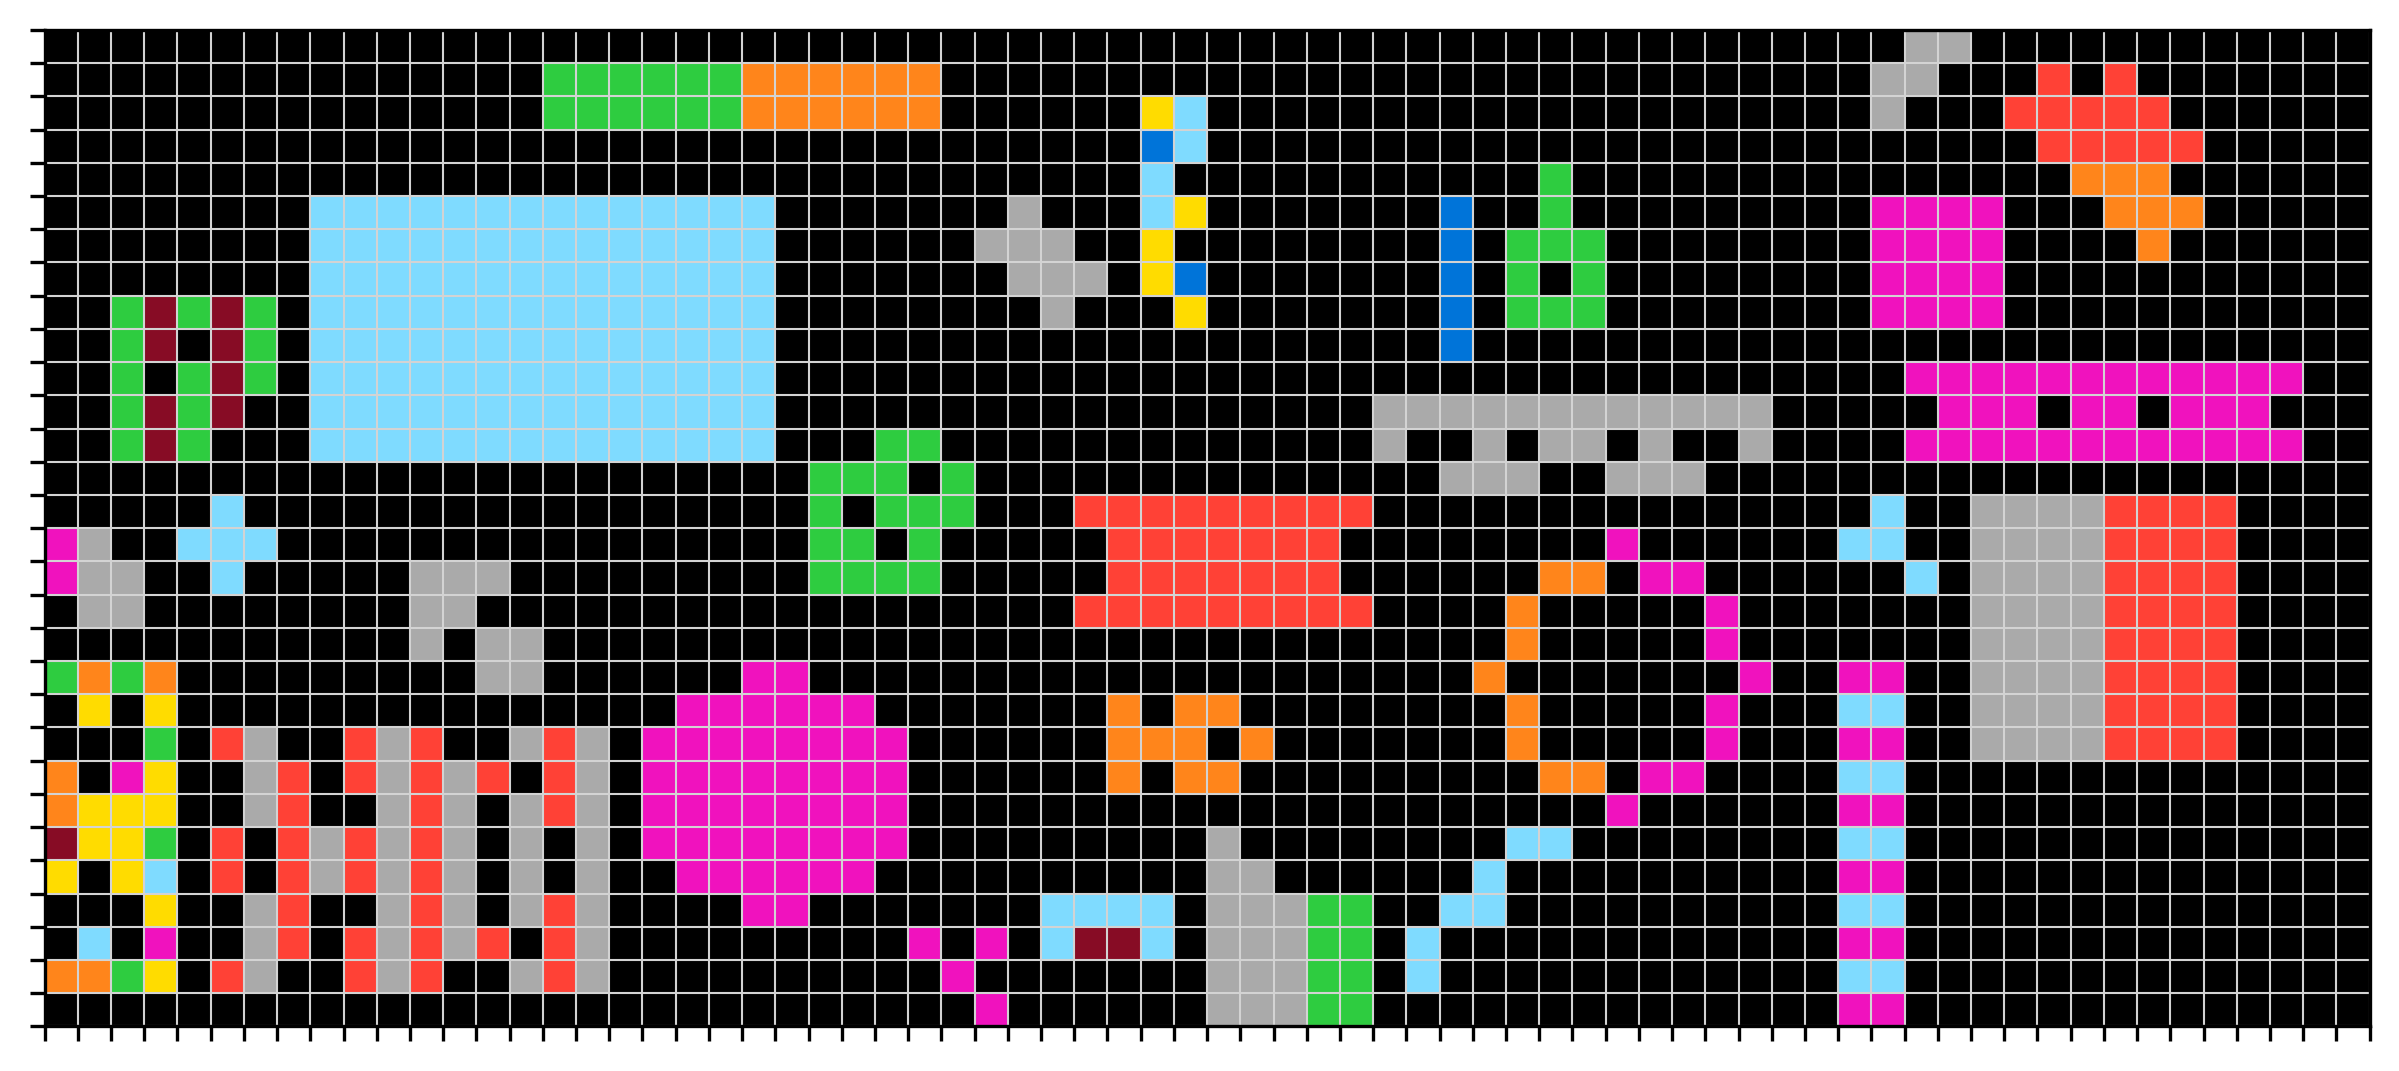

In [2]:
%load_ext autoreload
%autoreload 2
import generator
import time
import sys 
from arcworld.general_utils import plot_task, plot_grid, randomly_add_shape_to_world
import numpy as np

config_small = {
    "min_n_shapes_per_grid": 1,
    "max_n_shapes_per_grid": 8,
    "n_examples": 8,
    "min_grid_size": 20,
    "max_grid_size": 60,
    "allowed_combinations": [["translate_up"]],
    "allowed_transformations": None,
    "min_transformation_depth": None,
    "max_transformation_depth": None,
    "shape_compulsory_conditionals": ["is_shape_fully_connected", 
                                      "is_shape_less_than_6_rows", 
                                      "is_shape_less_than_6_cols", 
                                      "is_shape_simple"]
                                    
}

config_large = {
    "min_n_shapes_per_grid": 1,
    "max_n_shapes_per_grid": 8,
    "n_examples": 8,
    "min_grid_size": 20,
    "max_grid_size": 60,
    "allowed_combinations": [["translate_up"]],
    "allowed_transformations": None,
    "min_transformation_depth": None,
    "max_transformation_depth": None,
    "shape_compulsory_conditionals": ["is_shape_fully_connected", 
                                      "is_shape_more_than_6_cell"]
                                    
}

gen_large = generator.generator(config_large, debug_mode=True)
compatible_shape_rows_large = gen_large.get_compatible_shape_rows(
                shape_conditionals_to_satisfy=gen_large.config.shape_compulsory_conditionals,
                shape_conditionals_not_to_satisfy=[]
            )

gen_small = generator.generator(config_small, debug_mode=True)
compatible_shape_rows_small = gen_small.get_compatible_shape_rows(
                shape_conditionals_to_satisfy=gen_small.config.shape_compulsory_conditionals,
                shape_conditionals_not_to_satisfy=[]
            )


n_shapes = 15
shapes_to_position_large = gen_large.randomly_sample_shapes(compatible_shape_rows = compatible_shape_rows_large,
                                    n_shapes_wanted = 25)

shapes_to_position_small = gen_small.randomly_sample_shapes(compatible_shape_rows = compatible_shape_rows_small,
                                    n_shapes_wanted = 12)


grid = np.zeros((30,70))
for ss in [shapes_to_position_small, shapes_to_position_large]:
    for s in ss:
        try:
            grid, positionned_s = randomly_add_shape_to_world(grid, s)
        except:
            continue

plot_grid(grid, size = (10,10), save_path = "shapes_plot_1.png")

# Plot Tasks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


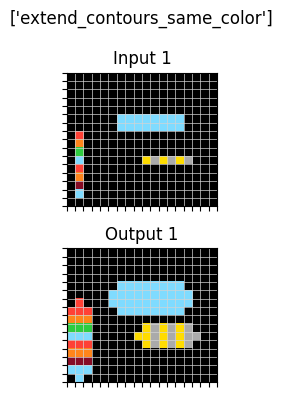

In [86]:
# At each run, the generator will create a new task with a different combination of transformations, as described in the config file.
%load_ext autoreload
%autoreload 2
import generator
import time
import sys 
from arcworld.general_utils import plot_task, plot_grid, randomly_add_shape_to_world
import numpy as np

config = {
    "min_n_shapes_per_grid": 2,
    "max_n_shapes_per_grid":3,
    "n_examples": 1,
    "min_grid_size": 13,
    "allowed_combinations": [["extend_contours_same_color"]],
    "max_grid_size": 18,
    "allowed_transformations": None,
    "min_transformation_depth": None,
    "max_transformation_depth": None,
    "shape_compulsory_conditionals": ["is_shape_less_than_11_rows", 
                                      "is_shape_less_than_11_cols", 
                                      "is_shape_fully_connected"],
}

gen = generator.generator(config, debug_mode=False) # Initialize the generator with the config
task = gen.generate_single_task() # Generate a single task
plot_task(task, size = (4,4))

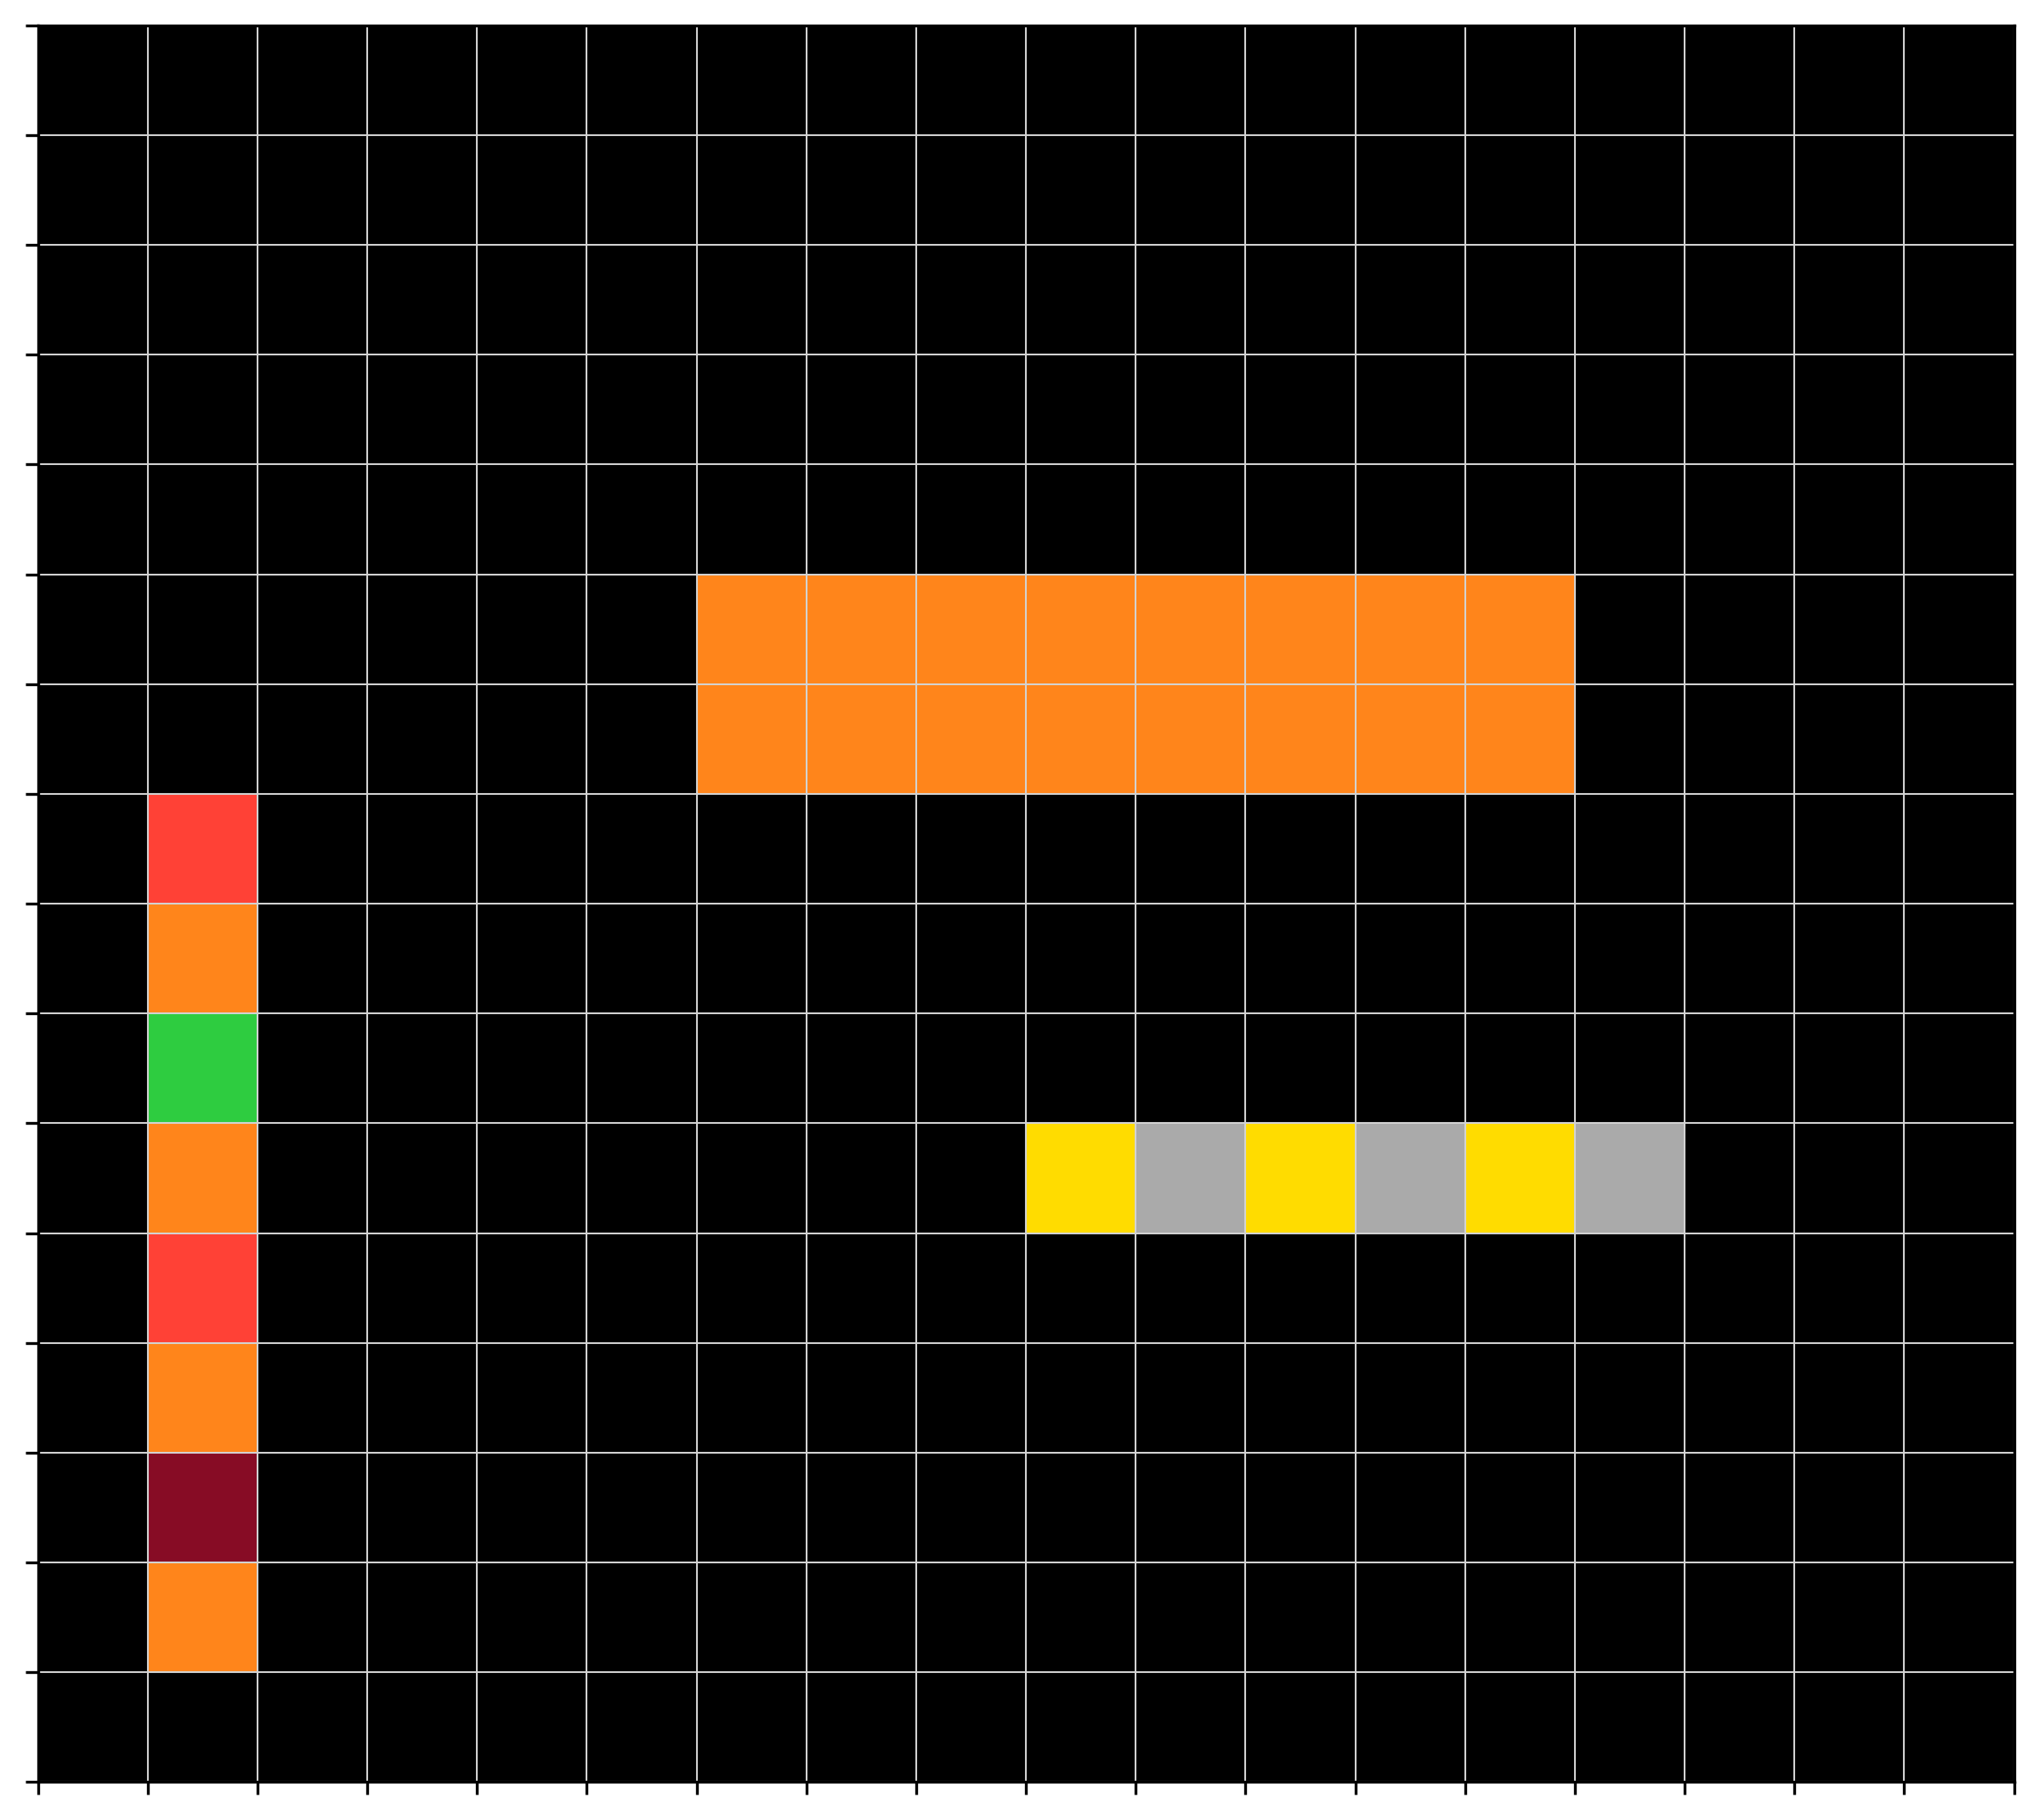

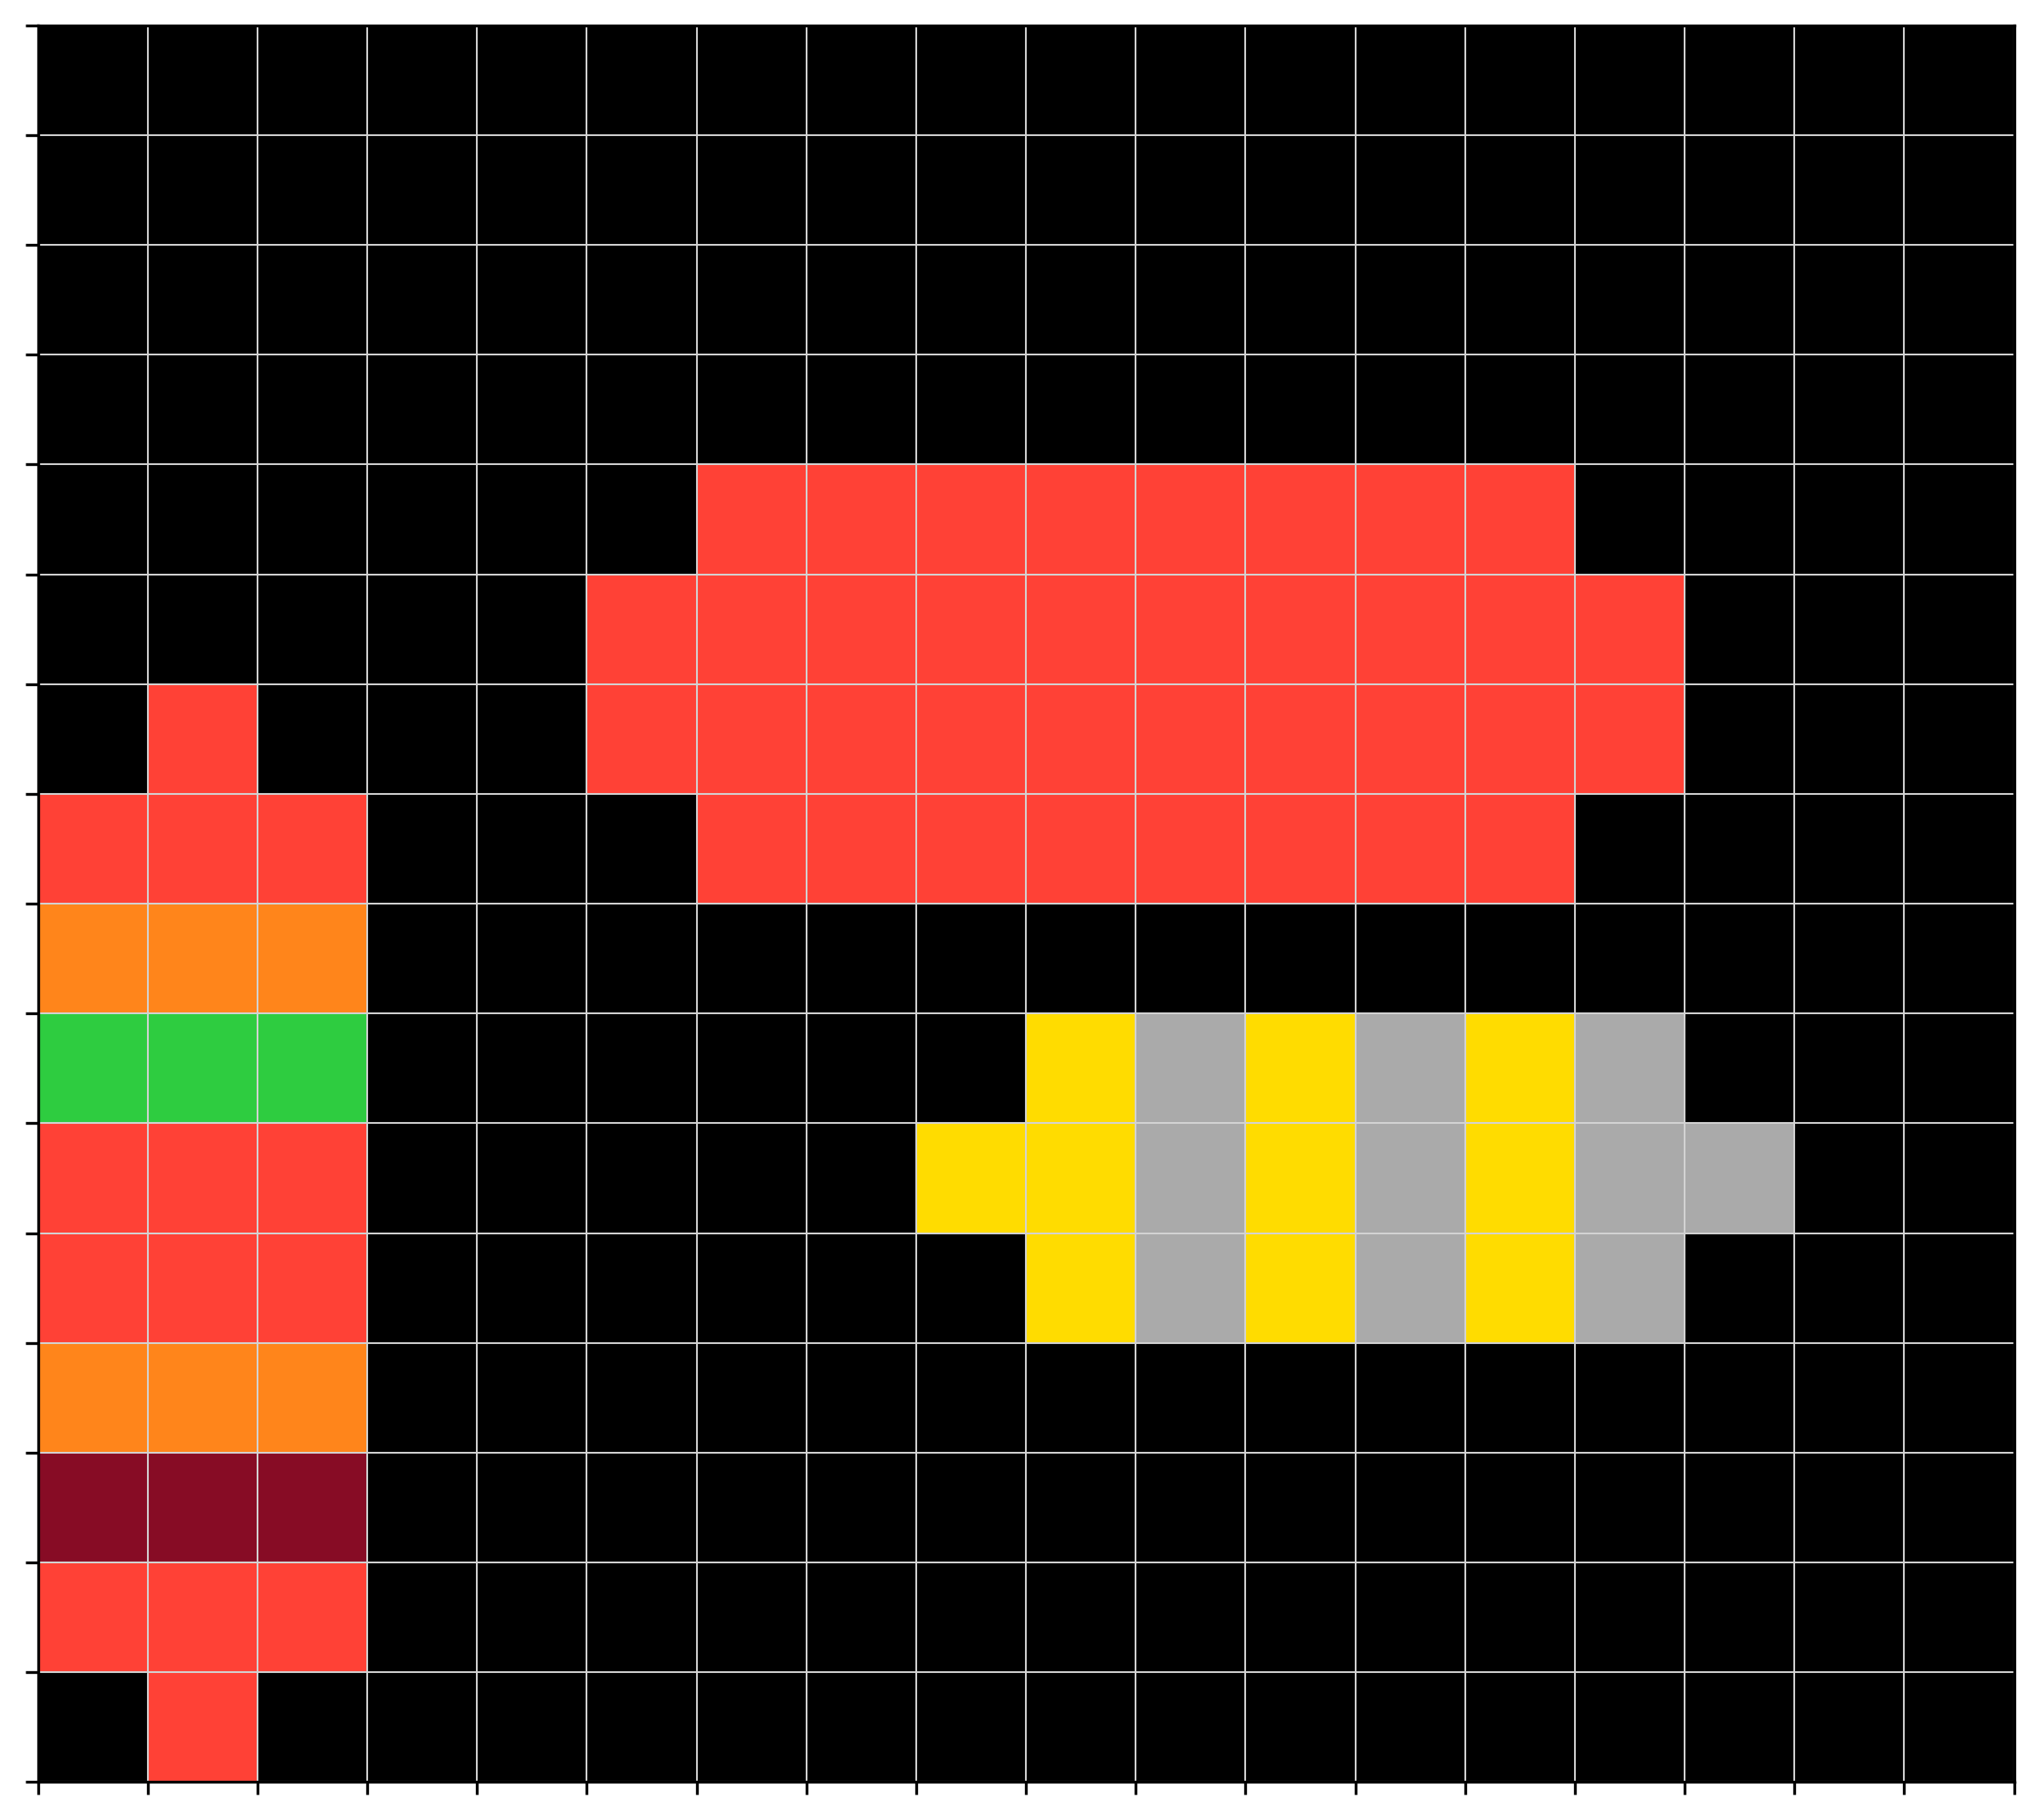

In [97]:
inp = task["pairs"][0]["input"]
out = task["pairs"][0]["output"] 

# replace the 8s with 6s to visualize 
inp = np.where(inp == 8, 7, inp)
out = np.where(out == 8, 2, out)


plot_grid(inp, size = (10,10), save_path = "comb_5_input.png")
plot_grid(out, size = (10,10), save_path = "comb_5_output.png")

# Count Elapsed Time

In [4]:
# At each run, the generator will create a new task with a different combination of transformations, as described in the config file.

config = {
    "min_n_shapes_per_grid": 4,
    "max_n_shapes_per_grid": 4,
    "n_examples": 1,
    "min_grid_size": 20,
    "max_grid_size": 20,
    "allowed_combinations": None,
    "allowed_transformations": ["crop_top_side", "translate_up", "translate_left", "mirror_horizontal", "rot90"],
    "min_transformation_depth": 2,
    "max_transformation_depth": 2,
    "shape_compulsory_conditionals": ["is_shape_less_than_6_rows", 
                                      "is_shape_less_than_6_cols"],
}

gen = generator.generator(config, debug_mode=False) # Initialize the generator with the config


times = []
for i in range(1000):
    start = time.time()
    task = gen.generate_single_task() # Generate a single task
    end = time.time()
    times.append(end - start)

print("Average time to generate a task: ", np.mean(times))
print("Max time to generate a task: ", np.max(times))
print("Min time to generate a task: ", np.min(times))
print("Std time to generate a task: ", np.std(times))

Average time to generate a task:  0.005396685361862183
Max time to generate a task:  0.02621173858642578
Min time to generate a task:  0.0035791397094726562
Std time to generate a task:  0.002738526547583773
